In [173]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [239]:
csv_path = Path("Tornado_alley/Resources/merged_data.csv")
tornadoes_df = pd.read_csv(csv_path, encoding="UTF-8")
tornadoes_df.head()

,index_name,Year,Date,State,Rating,Injuries,Death,Start_Lat,Start_Lon,End_Lat,End_Lon,Width
0,0,1979,1979-03-18,KS,1,0,0,39,-96,39,-96,150
1,1,1979,1979-03-18,OK,2,0,0,36,-95,36,-95,33
2,2,1979,1979-03-18,OK,3,0,0,36,-95,36,-95,30
3,3,1979,1979-03-19,OK,1,0,0,34,-95,34,-95,30
4,4,1979,1979-03-29,IA,2,0,0,41,-93,41,-93,60


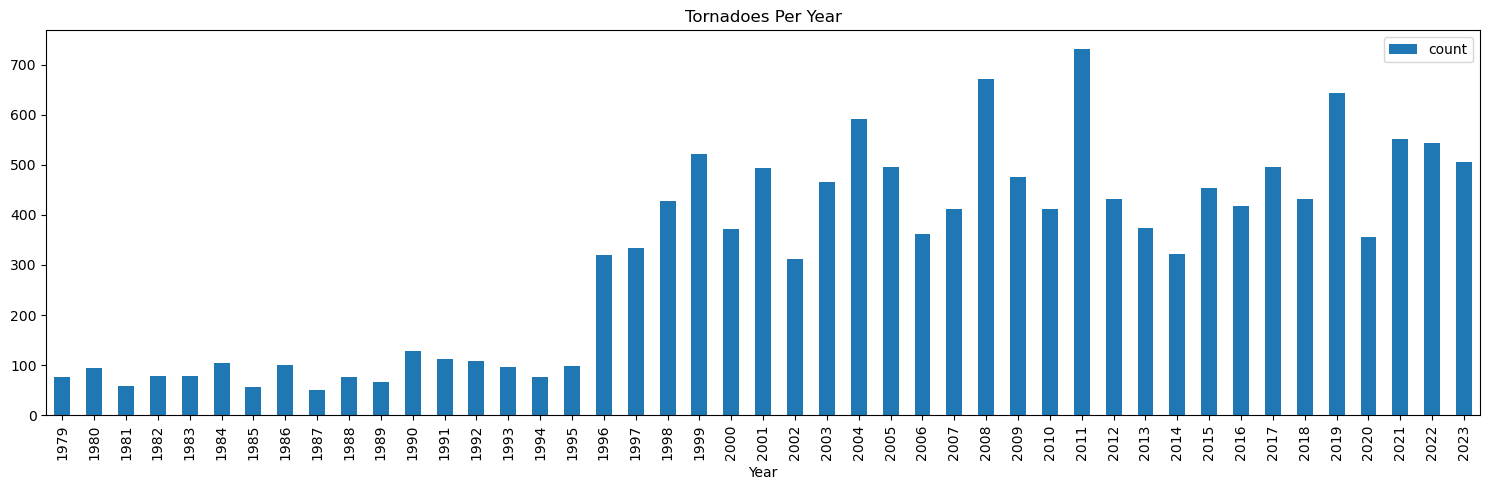

In [225]:
a = tornadoes_df["Year"].value_counts()
b = pd.DataFrame(a)
Torandoes_per_year = b.sort_values("Year")


Torandoes_per_year.plot(kind="bar", figsize=(15, 5))
plt.title("Tornadoes Per Year")
plt.tight_layout()


C:\Users\blake\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


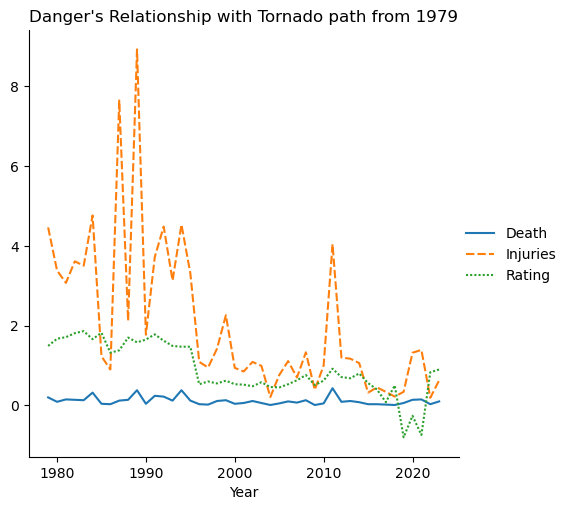

In [238]:
R = tornadoes_df.groupby("Year")["Rating"].mean()
Rdfr = round(R, 2)
Rdf = pd.DataFrame(Rdfr)

I = tornadoes_df.groupby("Year")["Injuries"].mean()
Idfr = round(I, 2)
Idf = pd.DataFrame(Idfr)

D = tornadoes_df.groupby("Year")["Death"].mean()
Ddfr = round(D, 2)
Ddf = pd.DataFrame(Ddfr)

Merge1 = pd.merge(Ddf, Idf, on="Year")
Merged_Danger_df = pd.merge(Merge1, Rdf, on="Year")

sns.relplot(data=Merged_Danger_df, kind="line").set(title="Danger's Relationship with Tornado path from 1979")

C:\Users\blake\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


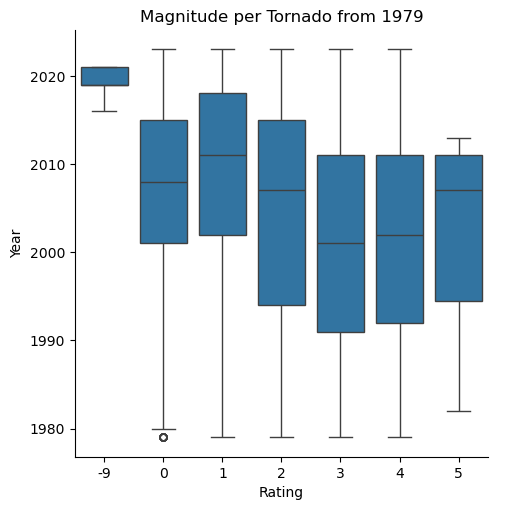

In [240]:
sns.catplot(data=tornadoes_df, x="Rating", y="Year", kind="box").set(title="Magnitude per Tornado from 1979")